# 11.7 Moving Window Functions
## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Introduction

In [ ]:
close_px_all = pd.read_csv(
    r'F:\books\pydata-book-3rd-edition\examples\stock_px.csv',
    parse_dates=True,
    index_col=0)

close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

### Rolling window functions

In [ ]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [ ]:
close_px.AAPL.rolling(250).mean().plot()

In [ ]:
plt.figure()
std250 = close_px.AAPL.pct_change().rolling(250, min_periods=10).std()
std250[5:12]

In [ ]:
std250.plot()

In [ ]:
expanding_mean = std250.expanding().mean()
expanding_mean.plot()

In [ ]:
plt.style.use('grayscale')
close_px.rolling(60).mean().plot(logy=True)

In [ ]:
close_px.rolling('20D').mean().plot()

## Exponentially Weighted Functions

In [ ]:
aapl_px = close_px.AAPL["2005":"2007"]
ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewa30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style='k-', label='Price')
ma30.plot(style='k--', label='MA30')
ewa30.plot(style='k-', label='EWA30')
plt.legend()
plt.title('AAPL Price with 30-Day MA and EWA')

## Binary Moving Window Functions

In [ ]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

spx_rets.plot(label='S&P 500', figsize=(10, 6))
returns.plot(alpha=0.5)

In [ ]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot(label='AAPL vs S&P 500', figsize=(10, 6))
plt.legend(loc='best')

In [ ]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot(label='Companies vs S&P 500', figsize=(10, 6))

## User-Defined Moving Window Functions

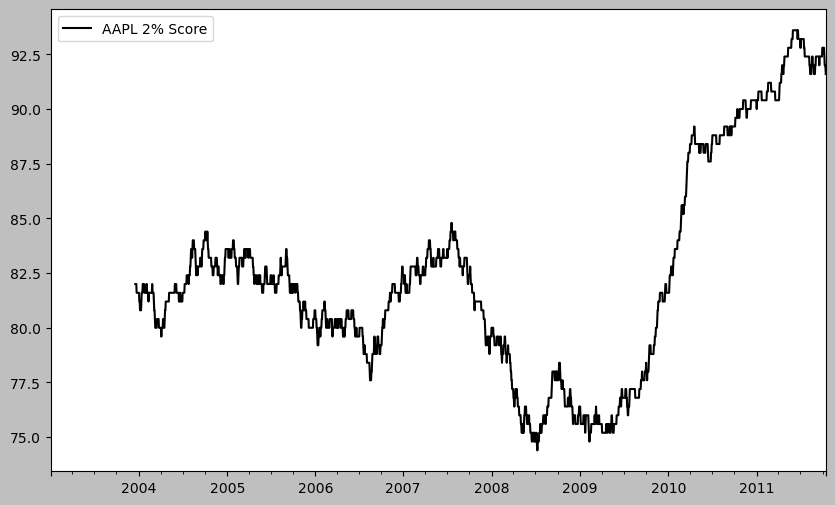

In [38]:
from scipy.stats import percentileofscore

def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot(label='AAPL 2% Score', figsize=(10, 6))
plt.legend(loc='best')